In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
#Load Dataset
data = pd.read_csv("VCB Historical Data final.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/01/2017,36620.0,36847.0,37075.0,36392.0,2.66M,-0.41%
1,12/04/2017,37454.0,36772.0,37454.0,36620.0,2.48M,2.28%
2,12/05/2017,36468.0,37151.0,37909.0,36468.0,2.52M,-2.63%
3,12/06/2017,36392.0,36392.0,36620.0,35710.0,2.68M,-0.21%
4,12/07/2017,36089.0,36392.0,36392.0,35407.0,3.49M,-0.83%
...,...,...,...,...,...,...,...
1371,06/05/2023,98000.0,95200.0,98700.0,95200.0,1.30M,3.27%
1372,06/06/2023,99000.0,98000.0,99000.0,96500.0,759.50K,1.02%
1373,06/07/2023,97000.0,99000.0,99000.0,97000.0,749.60K,-2.02%
1374,06/08/2023,100000.0,97000.0,101700.0,97000.0,1.34M,3.09%


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1376 non-null   object 
 1   Price     1376 non-null   float64
 2   Open      1376 non-null   float64
 3   High      1376 non-null   float64
 4   Low       1376 non-null   float64
 5   Vol.      1376 non-null   object 
 6   Change %  1376 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.4+ KB


,Price,Open,High,Low
count,1376.000000,1376.000000,1376.000000,1376.000000
mean,66180.946948,66123.944041,66962.237645,65310.408430
std,15338.628380,15340.420842,15481.638346,15160.994459
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51989.000000,51912.000000,52583.750000,51362.750000
50%,67715.500000,67578.000000,68153.500000,66810.000000
75%,77400.000000,77342.000000,78585.000000,76400.000000
max,100500.000000,100000.000000,102000.000000,99000.000000


In [4]:
#Chọn thuộc tính
data = data[['Price']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,Price
0,36620.0
1,37454.0
2,36468.0
3,36392.0
4,36089.0
...,...
1371,98000.0
1372,99000.0
1373,97000.0
1374,100000.0


<Axes: >

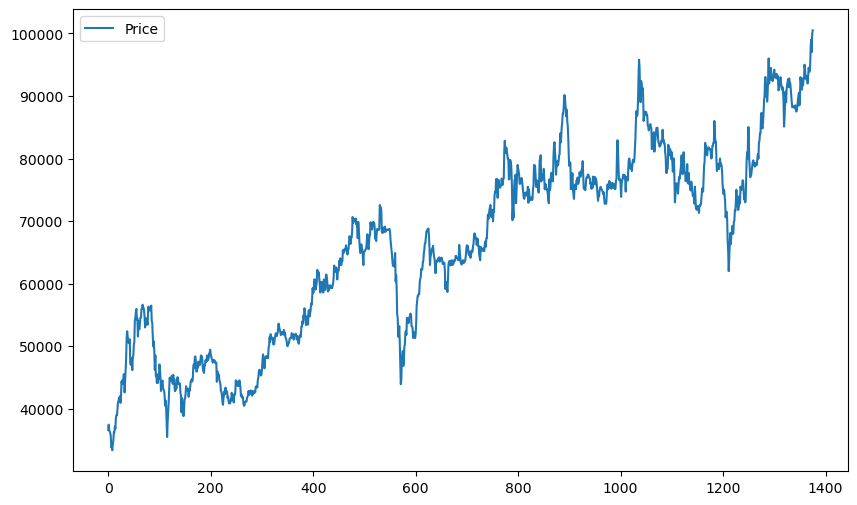

In [5]:
data.plot(figsize=(10,6))

In [6]:
# Chia tập dữ liệu thành train, test, validate (70-20-10)
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 963
Test data size: 275
Validate data size: 138


In [7]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [9]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[96631.42454045 96672.85687171 96714.28920298 96755.72153424
 96797.15386551 96838.58619677 96880.01852804 96921.4508593
 96962.88319057 97004.31552183 97045.7478531  97087.18018436
 97128.61251563 97170.04484689 97211.47717816 97252.90950942
 97294.34184069 97335.77417195 97377.20650322 97418.63883448
 97460.07116575 97501.50349701 97542.93582828 97584.36815955
 97625.80049081 97667.23282208 97708.66515334 97750.09748461
 97791.52981587 97832.96214714]


In [12]:
# Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 7494.371570117192
Testing RMSE: 9996.634618423068


In [13]:
# MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape_validate = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation MAPE:', mape_validate)
print('Testing MAPE:', mape_test)

Validation MAPE: 6.971149652427061
Testing MAPE: 10.782296792003018


In [14]:
# MAE
mae_test = np.mean(np.abs(y_test - y_pred))
mae_val = np.mean(np.abs(y_val - y_pred_val))
print("Validation MAE:", mae_val)
print("Testing MAE:", mae_test)

Validation MAE: 5771.113384484661
Testing MAE: 8108.665093580752


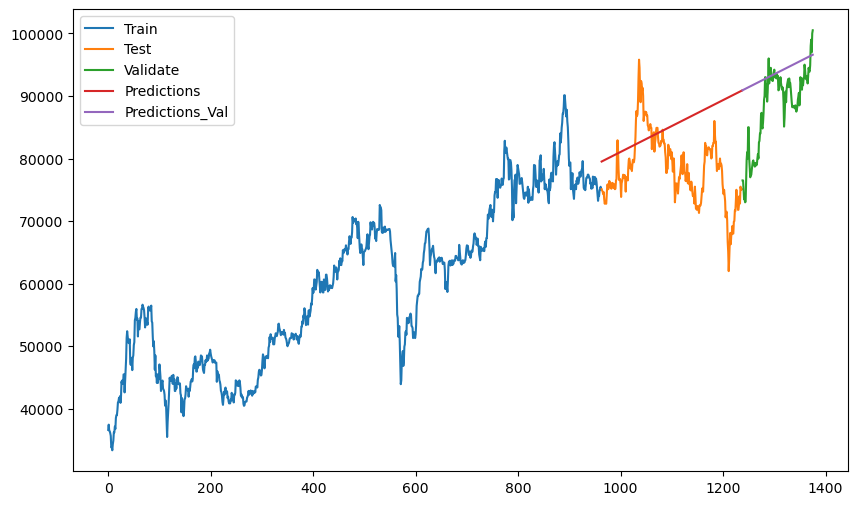

In [18]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

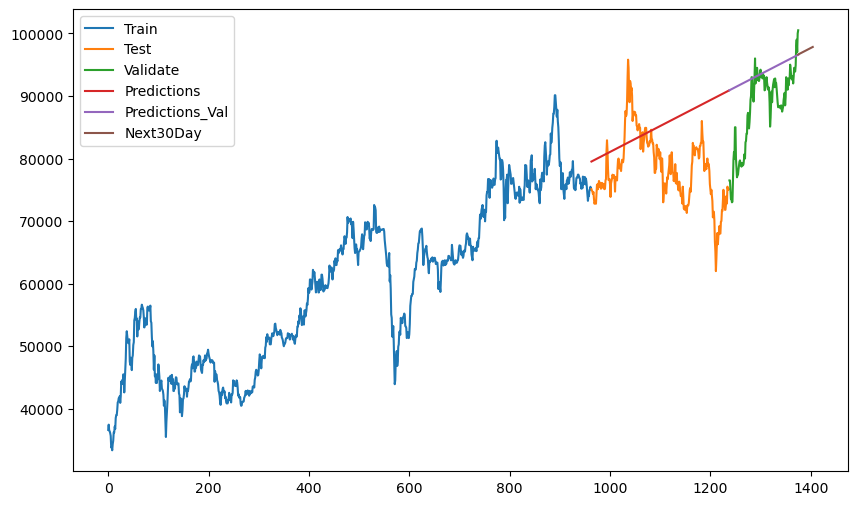

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Validate' ,'Predictions','Predictions_Val','Next30Day'])
plt.show()

In [20]:
# Lấy hệ số và hệ số góc của mô hình
coef = model.coef_
intercept = model.intercept_

# Xuất phương trình
print("Phương trình: y =", coef, "* x +", intercept)

Phương trình: y = [41.43233127] * x + 39620.536719621865


In [21]:
# Lấy các hệ số và hệ số chặn
coefficients = model.coef_
intercept = model.intercept_

# Xuất phương trình
equation = "y = " + " + ".join([f"{coef:.2f} * x{i+1}" for i, coef in enumerate(coefficients)]) + f" + {intercept:.2f}"
print("Phương trình Linear Regression:")
print(equation)

Phương trình Linear Regression:
y = 41.43 * x1 + 39620.54


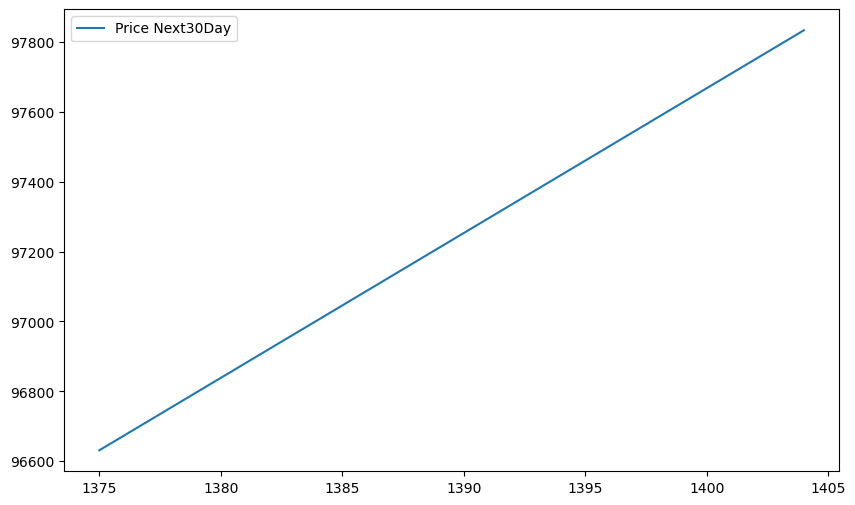

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['Price Next30Day'])
plt.show()